In [9]:
from utils import utils 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [10]:
df=utils.generate_synthetic_data(duration_cycle=5, start_day=25, year=2021, start_month_index=1, number_of_cycle=20, period_duration=30)
periods_data=utils.calculate_datatime(df)
features, labels=utils.generate_final_features(df)

In [11]:

x_train, x_test, y_train, y_test  = train_test_split(features, labels, test_size=0.5, random_state=0) 
train_y=np.array(y_train)
train_x=np.array(x_train)
test_x=np.array(x_test)
test_y=np.array(y_test)
train_x = train_x.reshape((train_x.shape[0],train_x.shape[1]*train_x.shape[2]))
train_y=train_y.reshape((train_y.shape[0], train_y.shape[1]*1))
test_x = test_x.reshape((test_x.shape[0],test_x.shape[1]*test_x.shape[2]))
test_y = test_y.reshape((test_y.shape[0],test_y.shape[1]*1))


In [12]:
model_RD=RandomForestClassifier()
model_RD.fit(train_x, train_y)
y_pred=model_RD.predict(test_x)
output_red=[(int)]
output_pred = [[int(round(i[0])), int(round(i[1]))] for i in y_pred] # aqui você está arredondando os dados preditos pelo o modelo e formatando eles 
print(output_pred) 

[[28, 6], [28, 6], [28, 6], [28, 5], [28, 6], [30, 5], [30, 6], [30, 5], [26, 6]]


In [13]:
cycle_length=[]
periods=[]
for i in range(len(output_pred)):
  cycle_length.append(output_pred[i][0] )
  periods.append(output_pred[i][1])

Text(0.5, 1.0, 'Duração dos ciclos e variação dos periodos')

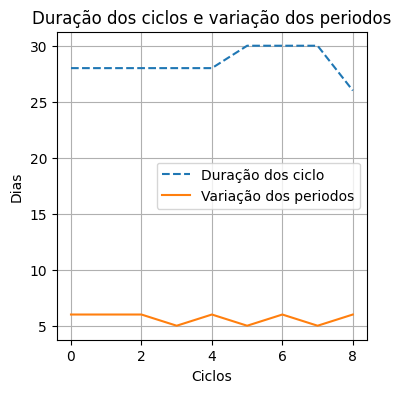

In [15]:
plt.figure(figsize=(4,4))
plt.plot(cycle_length, '--')
plt.plot(periods)
plt.legend(['Duração dos ciclo', 'Variação dos periodos'])
plt.grid()
plt.xlabel('Ciclos')
plt.ylabel('Dias')
plt.title('Duração dos ciclos e variação dos periodos')